In [16]:
# import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import ShuffleSplit
from scipy.stats import mode
from sklearn.metrics import accuracy_score

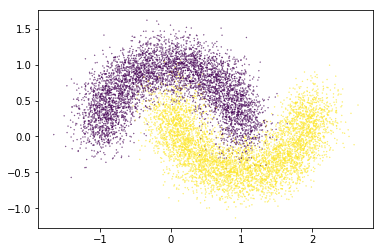

In [2]:
# create data
train_size = 100000
X, y = make_moons(n_samples=110000,noise=0.2)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]
plt.scatter(X_test[:,0],X_test[:,1],s=0.1,c=y_test)

In [5]:
# split data into 1k subsets
n_subsets = 1000
X_subs = X_train.reshape([n_subsets,-1,2])
y_subs = y_train.reshape([n_subsets,-1])
print(X_subs.shape, y_subs.shape)

(1000, 100, 2) (1000, 100)


In [6]:
# init forest
forest = []
for i in range(n_subsets):
    forest.append(DecisionTreeClassifier(max_depth=8))

In [7]:
# grow forest
for i in range(n_subsets):
    forest[i].fit(X_subs[i],y_subs[i])

In [8]:
# evaluate on test set
accuracy = 0;
for i in range(n_subsets):
    accuracy+=forest[i].score(X_test, y_test)/n_subsets
accuracy

0.91528629999999944

In [12]:
# make predictions as a forest
test_pred = []
for i in range(n_subsets):
    test_pred.append(forest[i].predict(X_test))
test_pred = np.asarray(test_pred)
test_pred.shape

(1000, 10000)

In [13]:
test_pred, count = mode(test_pred)
test_pred.shape

(1, 10000)

In [15]:
test_pred = test_pred.reshape(-1)
test_pred.shape

(10000,)

In [17]:
accuracy_score(y_test,test_pred)

0.95909999999999995